<a href="https://colab.research.google.com/github/gcruchon/gen-ai-playground/blob/main/Hugging-Face-Transformer-Agent/TransformerAgents.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook to play around with Hugging Face Transformer Agents

## Install libraries

In [2]:
%%sh
pip install -U -q PyDrive
pip install transformers==4.29.0
pip install huggingface_hub==0.14.1
pip install diffusers==0.16.1
pip install --upgrade torch torchvision
pip install openai==0.27.6
pip install accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 55.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 37.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 119.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 6.9 MB/s eta 0:00:00
  Attempting uninstall: huggingface_hub
    Found existing installation: huggingface-hub 0.16.4
    Uninstalling huggingface-hub-0.16.4:
      Successfully uninstalled huggingface-hub-0.16.4
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 934.9/934.9 kB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.6/227.6 kB 6.8 MB/s eta 0:00:00


## Get Hugging Face Key

In [3]:
# Imports
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [4]:
# Google drive authentication
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Get Hugging Face Key
filename = "HF_key.txt"
drive_list = drive.ListFile({'q': "title='HF_key.txt'"}).GetList()
f = drive_list[0]
f_ = drive.CreateFile({'id': f['id']})
MY_HUGGING_FACE_KEY = f_.GetContentString()
print("Hugging face key found. Length=", len(MY_HUGGING_FACE_KEY))

Hugging face key found. Length= 37


## Login to Hugging Face

In [5]:
import huggingface_hub
from huggingface_hub import login

login(MY_HUGGING_FACE_KEY)

Token will not been saved to git credential helper. Pass `add_to_git_credential=True` if you want to set the git credential as well.
Token is valid.
Your token has been saved to /root/.cache/huggingface/token
Login successful


## Instantiate Agent

In [6]:
import transformers
from transformers import HfAgent

# Starcoder
agent_starcoder = HfAgent("https://api-inference.huggingface.co/models/bigcode/starcoder")

## Run Tasks

==Explanation from the agent==
I will use the following  tool: `image_generator` to generate an image.


==Code generated by the agent==
image = image_generator(prompt="golf course")


==Result==


  0%|          | 0/25 [00:00<?, ?it/s]

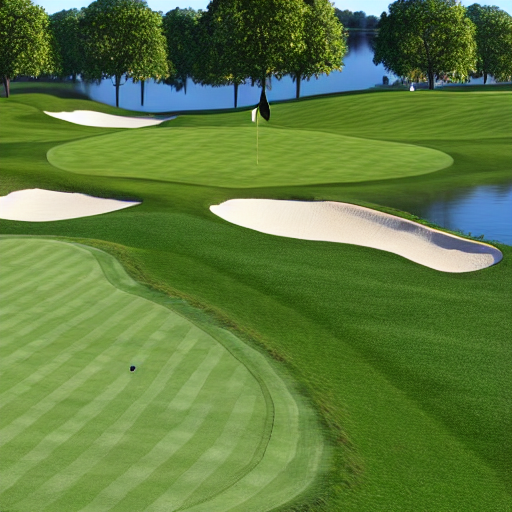

In [19]:
task = "Draw me a photo of a golf course"
picture_golf = agent_starcoder.run(task)
picture_golf

==Explanation from the agent==
I will use the following  tool: `image_transformer` to transform the image.


==Code generated by the agent==
image = image_transformer(image=picture, prompt="A car")


==Result==


  0%|          | 0/50 [00:00<?, ?it/s]

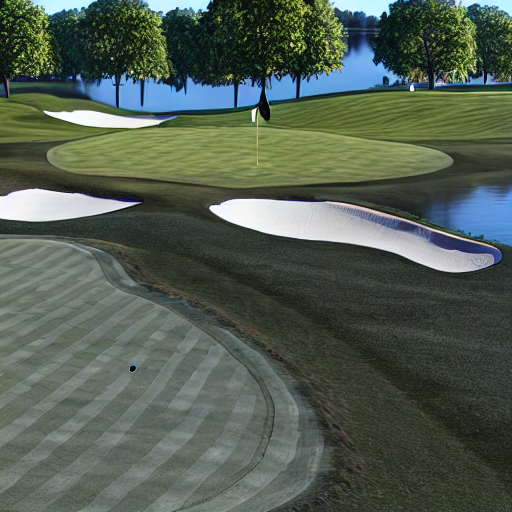

In [23]:
picture_golf_updated = agent_starcoder.run("Transform the image in `picture` to add a car", picture=picture_golf)
picture_golf_updated

In [ ]:
picture_ocean_updated = image_transformer(image=picture_ocean, prompt="A car")